In [1]:
# Задание 3 
# Загрузите данные по нашему кейсу с такси из файла uplift_data_less3.csv и сохраните их в переменную uplift_data. 
# Затем сгруппируйте данные по признаку treatment и посчитайте средние значения для признаков target и uplift — для нас это и будет сравнением конверсий.

import pandas as pd
import matplotlib.pyplot as plt

# загружаем данные с предсказанными значениями uplift
uplift_data = pd.read_csv('uplift_data_less3.csv')

# группируем данные по признаку treatment (0 - контрольная группа, 1 - тестовая группа) 
# treatment = 0 - контрольная группа (не получала воздействие)
# treatment = 1 - тестовая группа (получала воздействие)
# вычисляем средние значения целевой переменной (конверсии) и предсказанного uplift
conv = (uplift_data
    .groupby('treatment')
    # считаем средние значения target и uplift
    .agg({'target': 'mean', 'uplift': 'mean'})
    .reset_index()  # преобразуем индекс обратно в колонку для удобства просмотра
)

print(conv)

   treatment    target    uplift
0          0  0.195544  0.100059
1          1  0.293517  0.101229


In [2]:
# разный uplift Это действительно выглядит странно на первый взгляд, но есть логичное объяснение.

# Почему uplift разный для двух групп? 
# 1. Разный расчет для разных групп 
# Uplift-модель предсказывает индивидуальный эффект для каждого пользователя. Когда мы группируем по treatment и считаем среднее, мы получаем: 
#       Для контрольной группы (treatment=0): средний предсказанный uplift для тех, кто НЕ получил воздействие 
#       Для тестовой группы (treatment=1): средний предсказанный uplift для тех, кто получил воздействие  
# 
# 2. Причина различий  
# Модель могла предсказать разный uplift потому что: 
#       Разное распределение пользователей: В группах могут быть пользователи с разными характеристиками 
#       Шум модели: Uplift-модели сложны и могут давать небольшие расхождения 
#       Особенности алгоритма: Некоторые uplift-модели могут давать slightly разные предсказания для разных групп

# 3. Что должно быть в идеале
# В идеале средний uplift должен быть одинаковым для обеих групп, так как uplift - это оценка причинного эффекта, который не должен зависеть от фактического получения лечения.

# 4. Практический вывод 
# Разница 0.101229 - 0.100059 = 0.00117 очень мала (0.1%), что может быть связано с: 
#        Ошибками округления
#        Шумом в данных
#        Особенностями реализации модели 
#        Это нормально для реальных данных, особенно если разница статистически не значима.

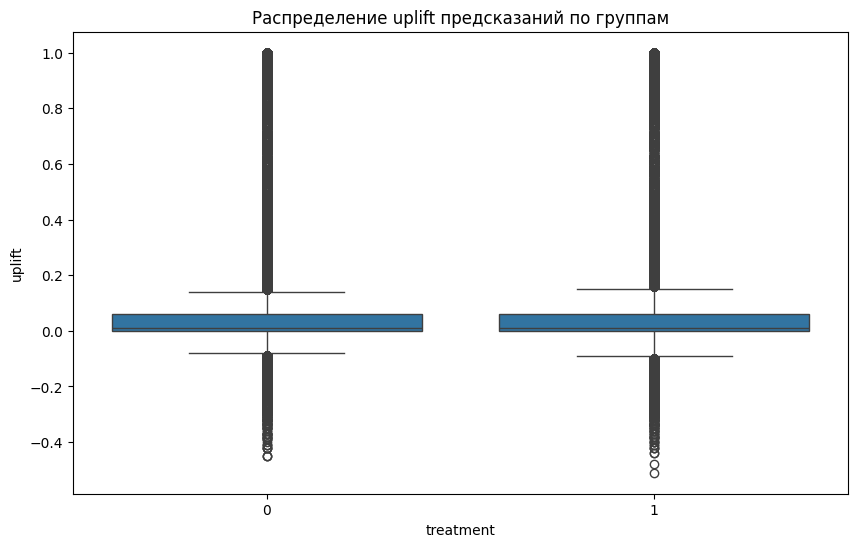

In [3]:
# Посмотрите на распределение uplift в группах
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=uplift_data, x='treatment', y='uplift')
plt.title('Распределение uplift предсказаний по группам')
plt.show()

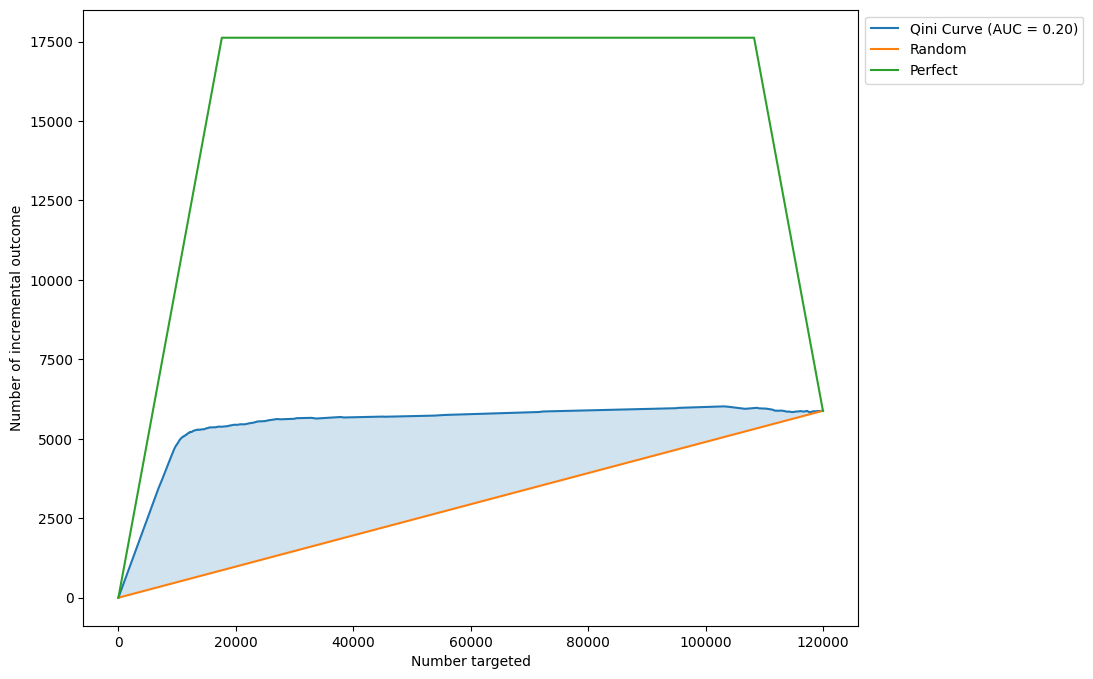

In [4]:
# 1. Qini-кривая и Qini-коэффициент

# Запустите код ниже, чтобы с помощью библиотеки sklift построить Qini-кривую.

from sklift.viz import plot_qini_curve
import pandas as pd

# загружаем данные
uplift_data = pd.read_csv("uplift_data_less3.csv")

# извлекаем необходимые данные из датафрейма
target = uplift_data.target      # целевая переменная (фактический результат)
uplift = uplift_data.uplift      # предсказанные значения uplift
treatment = uplift_data.treatment # индикатор группы (1 - тестовая, 0 - контрольная)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
# строим Qini-кривую
# perfect=True добавляет идеальную кривую для сравнения
plot_qini_curve(target, uplift, treatment, perfect=True, ax=axs,
                  name='Qini Curve')


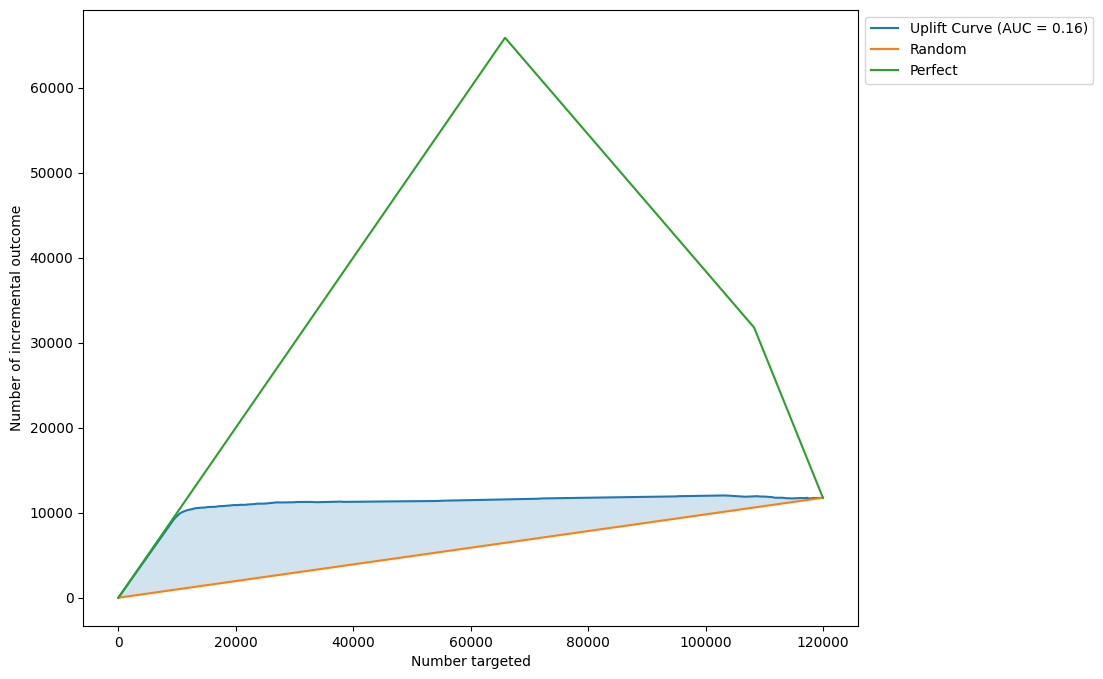

In [5]:
# 2. Uplift-кривая и AUUC (Area under Uplift curve) 

# Запустите код ниже, чтобы с помощью библиотеки sklift построить uplift-кривую.

### код который уже использовали ранее
from sklift.viz import plot_uplift_curve
import pandas as pd

uplift_data = pd.read_csv("uplift_data_less3.csv")
# извлекаем необходимые данные из датафрейма
target = uplift_data.target      # целевая переменная (фактический результат)
uplift = uplift_data.uplift      # предсказанные значения uplift
treatment = uplift_data.treatment # индикатор группы (1 - тестовая, 0 - контрольная)
### конец ранее использованного кода

fig, axs = plt.subplots(1, 1, figsize=(10, 8))

# строим uplift-кривую
# perfect=True добавляет идеальную кривую для сравнения
plot_uplift_curve(target, uplift, treatment, perfect=True, ax=axs,
                  name='Uplift Curve')


In [6]:
# 3. Uplift@K

#  Задание 7
# Рассчитаем uplift@k для нашего такси-датасета. Код, что вы напишете ниже, будет показывать топ-5% клиентов по значению uplift. 
# Необходимо отсортировать всех клиентов по uplift-скору (это уже есть в прекоде), 
# а затем из отсортированных значений выбрать топ-5% по значению uplift (вывести список топ-5% пользователей).

import pandas as pd

uplift_data = pd.read_csv("uplift_data_less3.csv")

# берём топ-5% клиентов по значению uplift
top_percent = 0.05

top_5_percent = (uplift_data
                .sort_values(by='uplift', ascending=False)
                .head(int(len(uplift_data) * top_percent))
)

print(top_5_percent)

        Unnamed: 0  treatment  target  uplift
119545      136059          0       0    1.00
119544      374453          0       0    1.00
119956      184546          0       0    1.00
53           34840          1       1    1.00
87690       381846          0       0    1.00
...            ...        ...     ...     ...
90127       123523          1       1    0.97
82435       345047          0       0    0.97
82418       150384          0       0    0.97
31477       207875          1       1    0.97
31518       364991          0       0    0.97

[6000 rows x 4 columns]


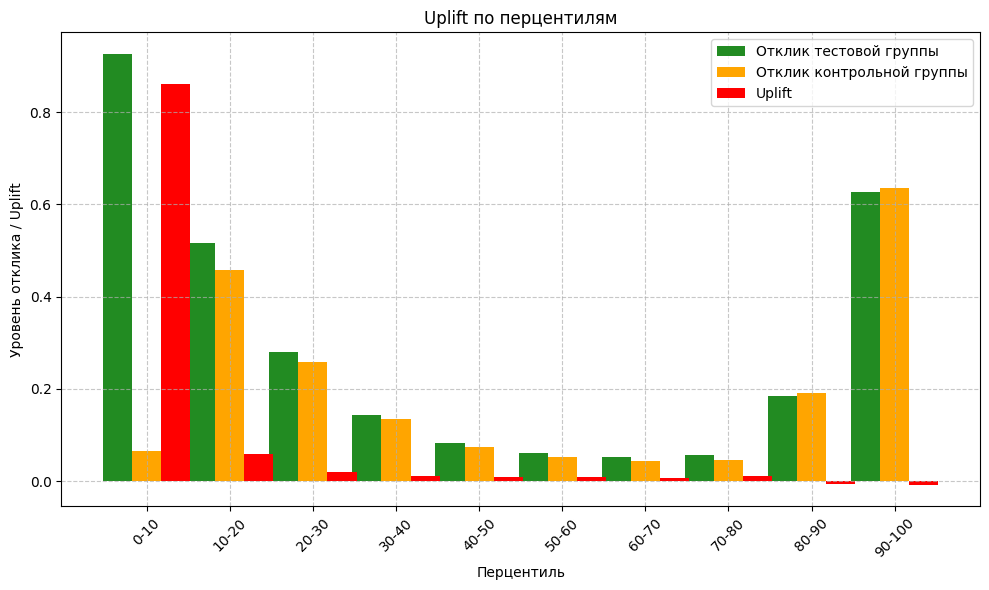

In [7]:
# 4. Uplift по перцентилям 
# 
# Визуализация uplift по перцентилям обычно представляется в виде гистограммы, 
# где по оси X отложены перцентиле, а по оси Y — значения uplift для каждого перцентиля. 
# Хорошая модель должна показывать монотонно убывающий график: наибольший uplift в первом перцентиле (топ-10% объектов) 
# и постепенное снижение к последнему перцентилю. 
# 
# Давайте напишем код для построения графика.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklift.metrics import uplift_by_percentile

def custom_uplift_by_percentile(y_true, uplift, treatment, 
                               kind='line', bins=10, string_percentiles=True, 
                               figsize=(10, 6), title=None):
    """
    Построение графика uplift по перцентилям.
    
    Аргументы:
        y_true: Бинарные целевые значения
        uplift: Прогнозируемые значения uplift
        treatment: Бинарные индикаторы воздействия
        kind: 'line' или 'bar'
        bins: Количество перцентильных корзин
        string_percentiles: Отображать ли перцентили в виде строк
        figsize: Размер рисунка (кортеж)
        title: Пользовательский заголовок для графика
    
    Возвращает:
        Рисунок matplotlib
    """
    
    # получаем данные по перцентилям, используя функцию из sklift
    df = uplift_by_percentile(
        y_true, uplift, treatment, strategy='overall',
        std=True, total=False, bins=bins, string_percentiles=False
    )
    
    # извлекаем перцентили из индекса DataFrame
    percentiles = df.index[:bins].values.astype(float)
    
    # извлекаем значения отклика для тестовой группы и их стандартные отклонения
    response_rate_trmnt = df.loc[percentiles, 'response_rate_treatment'].values
    std_trmnt = df.loc[percentiles, 'std_treatment'].values
    
    # извлекаем значения отклика для контрольной группы и их стандартные отклонения
    response_rate_ctrl = df.loc[percentiles, 'response_rate_control'].values
    std_ctrl = df.loc[percentiles, 'std_control'].values
    
    # извлекаем значения uplift и их стандартные отклонения
    uplift_score = df.loc[percentiles, 'uplift'].values
    std_uplift = df.loc[percentiles, 'std_uplift'].values
    
    # создаём график
    fig, ax = plt.subplots(figsize=figsize)
    
    if kind == 'line':
        # строим линейный график для тестовой группы с погрешностями
        ax.errorbar(
            percentiles, response_rate_trmnt, yerr=std_trmnt,
            linewidth=2, color='forestgreen', label='Отклик тестовой группы'
        )
        # строим линейный график для контрольной группы с погрешностями
        ax.errorbar(
            percentiles, response_rate_ctrl, yerr=std_ctrl,
            linewidth=2, color='orange', label='Отклик контрольной группы'
        )
        # строим линейный график для uplift с погрешностями
        ax.errorbar(
            percentiles, uplift_score, yerr=std_uplift,
            linewidth=2, color='red', label='Uplift'
        )
        # заполняем область между линиями тестовой и контрольной групп
        ax.fill_between(percentiles, response_rate_trmnt,
                        response_rate_ctrl, alpha=0.1, color='red')
        
        # добавляем горизонтальную линию на уровне 0, если есть отрицательные значения uplift
        if np.amin(uplift_score) < 0:
            ax.axhline(y=0, color='black', linewidth=1)
            
    elif kind == 'bar':
        # вычисляем ширину столбцов для столбчатой диаграммы
        width = percentiles[1] - percentiles[0] if len(percentiles) > 1 else 5
        bar_width = width * 0.35
        
        # строим столбцы для тестовой, контрольной групп и для uplift
        ax.bar(percentiles - bar_width, response_rate_trmnt, bar_width, 
               color='forestgreen', label='Отклик тестовой группы')
        ax.bar(percentiles, response_rate_ctrl, bar_width, 
               color='orange', label='Отклик контрольной группы')
        ax.bar(percentiles + bar_width, uplift_score, bar_width, 
               color='red', label='Uplift')
    
    # устанавливаем метки по оси X
    if string_percentiles:
        # создаём строковые метки для перцентилей (диапазоны)
        percentiles_str = [f"0-{percentiles[0]:.0f}"] + \
                          [f"{percentiles[i]:.0f}-{percentiles[i + 1]:.0f}" 
                           for i in range(len(percentiles) - 1)]
        ax.set_xticks(percentiles)
        ax.set_xticklabels(percentiles_str, rotation=45)
    else:
        # используем числовые значения перцентилей
        ax.set_xticks(percentiles)
    
    # устанавливаем подписи осей и заголовок
    ax.set_xlabel('Перцентиль')
    ax.set_ylabel('Уровень отклика / Uplift')
    
    # устанавливаем заголовок, если он предоставлен
    if title:
        ax.set_title(title)
  
    # добавляем легенду и сетку для улучшения читаемости
    ax.legend(loc='best')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # оптимизируем расположение элементов на графике
    plt.tight_layout()
    return fig

# Использование функции
fig = custom_uplift_by_percentile(
    target,  # целевые значения
    uplift,  # прогнозируемые значения uplift
    treatment,  # индикаторы воздействия 
    kind='bar',  # тип графика — столбчатая диаграмма
    bins=10,  # количество перцентильных корзин
    title='Uplift по перцентилям'  # заголовок графика
)
plt.show()

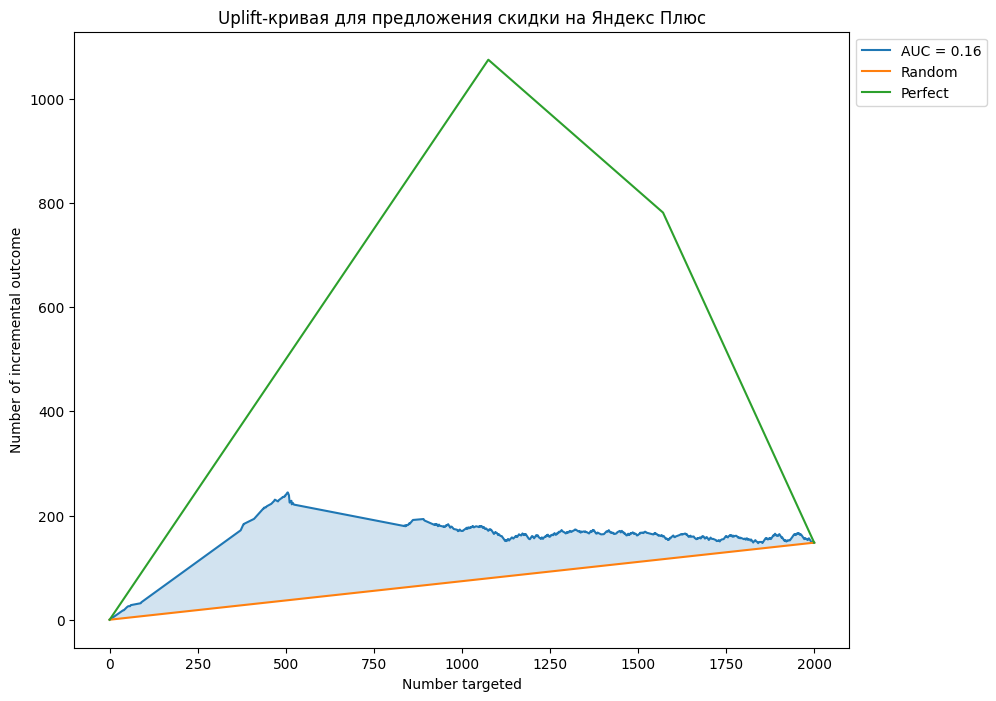

In [ ]:
# Теперь построим и проанализируем графики на реальных данных.
# 
# Задание 9
# Постройте uplift-кривую на основе предсказаний модели, оценивающей эффект от предложения скидки на подписку Яндекс Плюс. 
# Для этого используйте данные как по тестовой группе (клиенты, получившие предложение), так и по контрольной (клиенты без предложения).

import pandas as pd
import matplotlib.pyplot as plt
from sklift.viz import plot_uplift_curve  # Правильный импорт из кастомной библиотеки

# Загрузка данных
uplift_data = pd.read_csv("discount_uplift_metrics.csv")

# Извлечение необходимых столбцов
conversion = uplift_data['conversion']    # целевая переменная (конверсия)
uplift = uplift_data['uplift_pred']       # предсказанный uplift
treatment = uplift_data['treatment']      # индикатор воздействия (0 - контроль, 1 - тест)

# Построение uplift-кривой
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_uplift_curve(conversion, uplift, treatment, random=True, perfect=True, ax=ax)
plt.title('Uplift-кривая для предложения скидки на Яндекс Плюс')
plt.show()

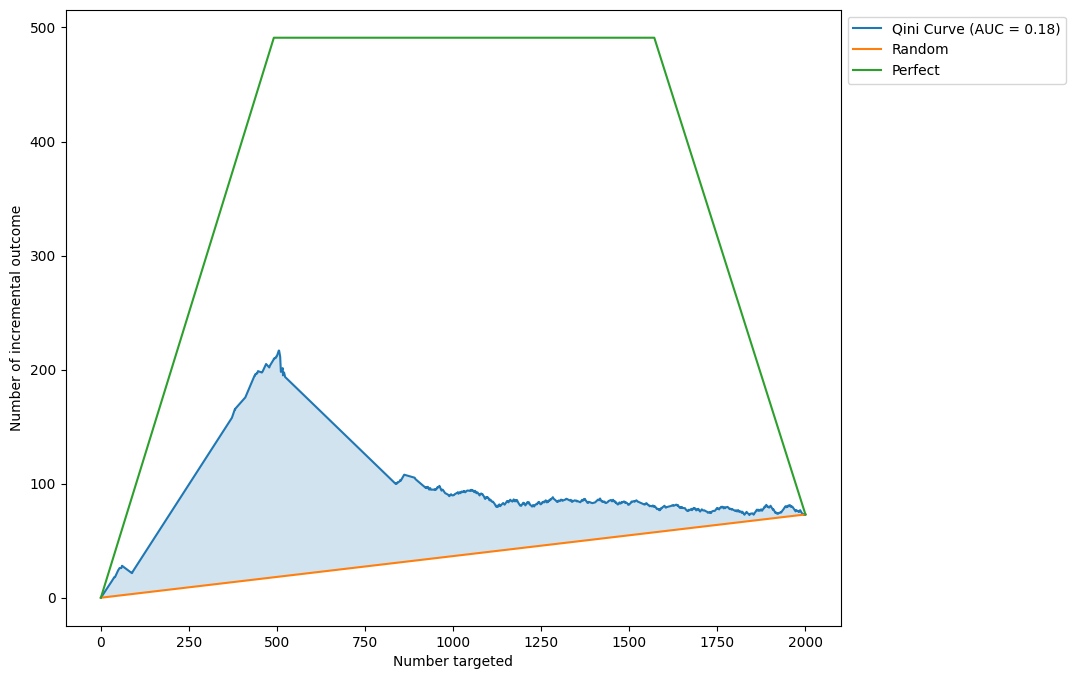

In [13]:
# Задание 10
# Постройте Qini-кривую. 

import pandas as pd
from sklift.viz import plot_qini_curve

uplift_data = pd.read_csv("discount_uplift_metrics.csv")
conversion = uplift_data.conversion
uplift = uplift_data.uplift_pred
treatment = uplift_data.treatment
    
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
plot_qini_curve(conversion, uplift, treatment, perfect=True, ax=axs,
                  name='Qini Curve')


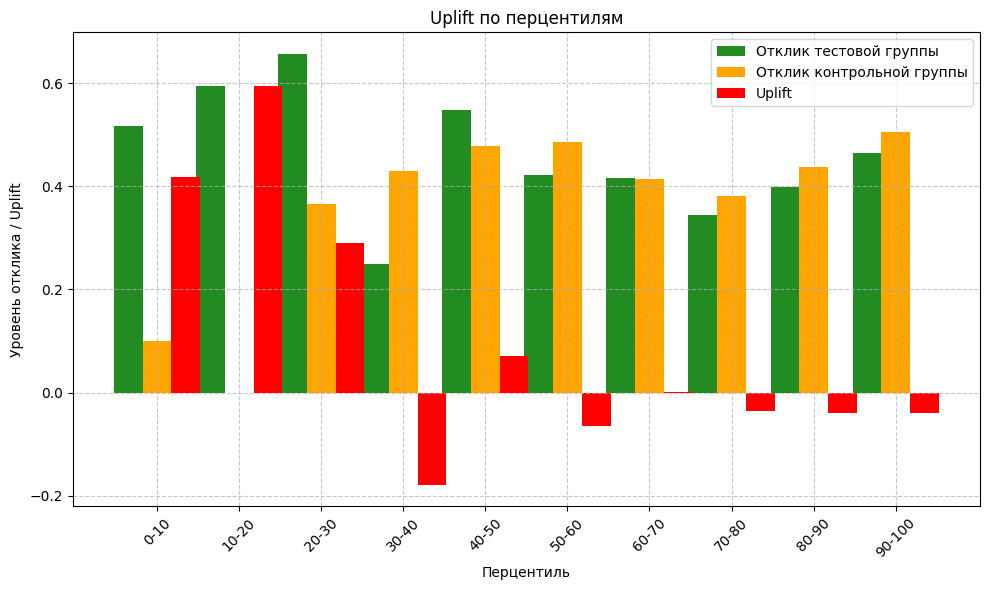

In [14]:
# Задание 11
# Постройте график uplift по перцентилям на основе функции, представленной в уроке. 
# Не забудьте использовать функцию из предыдущего задания.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklift.metrics import uplift_by_percentile

uplift_data = pd.read_csv("discount_uplift_metrics.csv")
conversion = uplift_data.conversion
uplift = uplift_data.uplift_pred
treatment = uplift_data.treatment


fig = custom_uplift_by_percentile(
    conversion, 
    uplift, 
    treatment,  
    kind='bar',  
    bins=10, 
    title='Uplift по перцентилям' 
)